# IN THE NAME OF GOD

In [5]:
import numpy as np
import pandas as pd

In [2]:
# Series are like lists in pure python
data = [1, 2, 3, 4, 5]
series = pd.Series(data, name='Numbers')
print(series)

0    1
1    2
2    3
3    4
4    5
Name: Numbers, dtype: int64


In [5]:
# data frames are like dictionaries in pure python
data = {
    'Name': ['Amin', 'Akbar', 'Toofan'],
    'Age': [24, 26, 26],
    'City': ['Tehran', 'Tehran', 'Shomal']
}

df = pd.DataFrame(data)
print(df)

     Name  Age    City
0    Amin   24  Tehran
1   Akbar   26  Tehran
2  Toofan   26  Shomal


نکته:
numpy.nan = None
با هم از نظر نوع داده فرق دارن


نکته:
برای مرتب سازی می توان از متد زیر در پانداس استفاده کرد:

pandas.sort_values(by=?, key=lambda)

link: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

اضافه کردن داده جدید به داده قبلی

In [11]:
d1 = {
    'a': [1, 2, 3],
    'b': [4, 5, 6]
}
df1 = pd.DataFrame(d1)
print('DF1:')
print(df1)

d2 = {
    'a': [7, 8, 9],
    'b': [10, 11, 12]
}
df2 = pd.DataFrame(d2)
print('DF2:')
print(df2)

# appending data frames | ignore indexing is False:
print('appended data frame | ignore indexing is False ')
df3 = df1.append(df2)
print(df3)

# appending data frames | ignore indexing is True:
print('appended data frame | ignore indexing is True ')
# df4 = df1.append(df2, ignore_index=True)
# new_d = pd.concat(df1, df2)
# print(new_d)

DF1:
   a  b
0  1  4
1  2  5
2  3  6
DF2:
   a   b
0  7  10
1  8  11
2  9  12
appended data frame | ignore indexing is False 
   a   b
0  1   4
1  2   5
2  3   6
0  7  10
1  8  11
2  9  12
appended data frame | ignore indexing is True 


C:\Users\saraye tel\AppData\Local\Temp\ipykernel_17912\3525203087.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df1.append(df2)


In [5]:
data = {
    'Name': ['Amin', 'Akbar', 'Toofan'],
    'Age': [24, 26, 25],
    'City': ['Tehran', 'Tehran', 'Shomal']
}

df = pd.DataFrame(data)
print(df['Age'] < 26)

0     True
1    False
2     True
Name: Age, dtype: bool


In [8]:
# in dataframe, if age < 26 ===> they're young
young = df[df['Age'] < 26]
print(young)

     Name  Age    City  IsStudent
0    Amin   24  Tehran       True
2  Toofan   25  Shomal      False


In [26]:
# NOTE:
#   THIS IS NOT A GOOD WAY OF ADDING DATA TO DATAFRAME
#   THIS WILL BE WRONG DATA IF WE SORT ANY CULOMN
#   USE APPEND TO DO THAT
# check out this link below:
'''https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/'''
df['IsStudent'] = df['Age'] < 25
print(df)

     Name  Age    City  height  IsStudent
0    Amin   24  Tehran     190       True
1   Akbar   26  Tehran     180      False
2  Toofan   25  Shomal     170      False


اضافه کردن یک ستون جدید به دیتا فریم

https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

In [29]:
# NOTE: 
#   CORRECT WAY OF ADDING IsStudent to dataframe:

data = {
    'Name': ['Amin', 'Akbar', 'Toofan'],
    'Age': [24, 26, 25],
    'City': ['Tehran', 'Tehran', 'Shomal']
}

df = pd.DataFrame(data)
# print(df['Age'] < 26)


height = {
    'height': [190, 180, 170]
}
# df2 = pd.DataFrame(height)

df = df.assign(**height)
print(df)

     Name  Age    City  height
0    Amin   24  Tehran     190
1   Akbar   26  Tehran     180
2  Toofan   25  Shomal     170


In [28]:
# sorting data
df_sor_age = df.sort_values(by='Age')
print(df_sor_age)

     Name  Age    City  height
0    Amin   24  Tehran     190
2  Toofan   25  Shomal     170
1   Akbar   26  Tehran     180


کار با داده کثیف

داده کثیف داده ای است که برخی مقادیر را ندارد

In [31]:
data = {
    'Name': ['Amin', 'Akbar', 'Toofan'],
    'Age': [24, 26, 25],
    'City': ['Tehran', 'Tehran', np.nan]
}

df = pd.DataFrame(data)

1. using df.isnull() ===> if a cell is nan, it'll return true
                          if a cell is filled, it'll return false

In [32]:
print(df.isnull())

    Name    Age   City
0  False  False  False
1  False  False  False
2  False  False   True


you can work on that like so:
    
    df.dropna() ====> remove any row where there is no data there

In [37]:
print(df)
print()
droped_df = df.dropna()
print(droped_df)

     Name  Age    City
0    Amin   24  Tehran
1   Akbar   26  Tehran
2  Toofan   25     NaN

    Name  Age    City
0   Amin   24  Tehran
1  Akbar   26  Tehran


you can also use:

df.fillna(num) ====> this will replace all nan values with num

In [41]:
print(df)
print()
filled_df = df.fillna(0)
print(filled_df)

     Name  Age    City
0    Amin   24  Tehran
1   Akbar   26  Tehran
2  Toofan   25     NaN

     Name  Age    City
0    Amin   24  Tehran
1   Akbar   26  Tehran
2  Toofan   25       0


گروه بنده یک قسمت خاص از داده و میانگین گیری روی آن

In [6]:
data = {
    'Name': ['Ali', 'Hassan', 'Zahra', 'Ahmad', 'Arezo', 'Sara', 'Amin', 'Hasti'],
    'Age': [20, 25, 29, 19, 16, 24, 23, 22],
    'City': ['Tehran', 'Boshehr', 'Rasht', 'Esfahan', 'Tehran', 'Tehran', 'Tehran', 'Tehran']
}
df = pd.DataFrame(data)
# print(df)

# grouping data and calculating average
grouped_df = df.groupby('City')['Age'].mean()
print(grouped_df)

City
Boshehr    25.0
Esfahan    19.0
Rasht      29.0
Tehran     21.0
Name: Age, dtype: float64


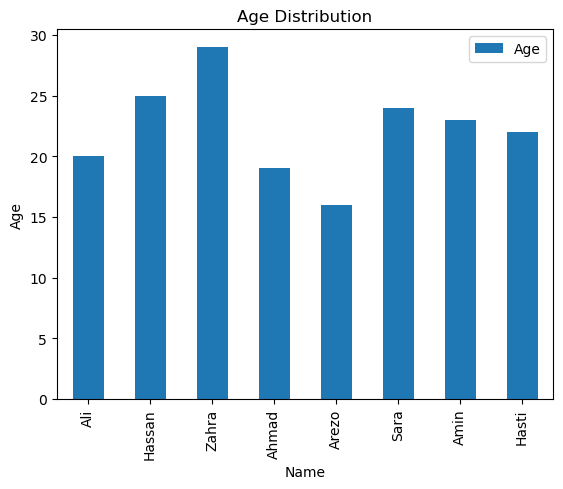

In [9]:
import matplotlib.pyplot as plt
df.plot(kind = 'bar', x = 'Name', y = 'Age', legend = True)
plt.title('Age Distribution')
plt.xlabel('Name')
plt.ylabel('Age')
plt.show()

توجه داشته باشید که این روش برای وقتی است که 2 تا دیتا فریم داشته باشیم.

بالاتر به این اشاره کردیم که یک ستون اضافه کنیم و آن ستون دیتا فریم نیست.

JOIN 2 dataframes that have a same column.

In [54]:
d1 = {
    'key': ['k0', 'k1', 'k2'],
    'data': ['d1', 'd2', 'd3']
}
df1 = pd.DataFrame(d1)
print('df1: ')
print(df1)
print()

d2 = {
    'key': ['k0', 'k1', 'k2'],
    'data1': ['d4', 'd5', 'd6']
}
df2 = pd.DataFrame(d2)
print('df2: ')
print(df2)
print()

df_joined = df1.set_index('key').join(df2.set_index('key'))
print('joined dataframe: ')
print(df_joined)

df1: 
  key data
0  k0   d1
1  k1   d2
2  k2   d3

df2: 
  key data1
0  k0    d4
1  k1    d5
2  k2    d6

joined dataframe: 
    data data1
key           
k0    d1    d4
k1    d2    d5
k2    d3    d6


کار کردن روی رسم نمودار ها

In [1]:
import matplotlib.pyplot as plt

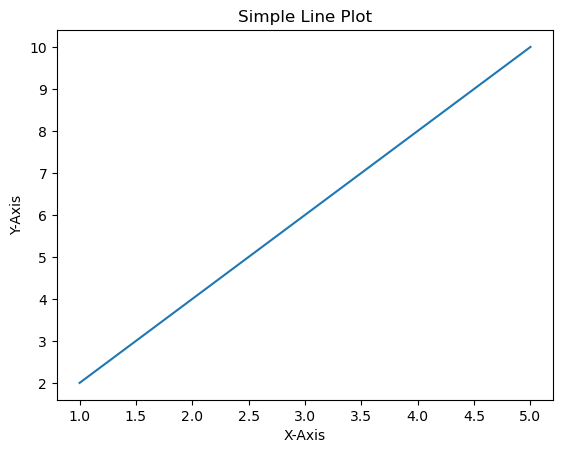

In [3]:
# 1. simplest way of plotting
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
plt.plot(x, y)
plt.title('Simple Line Plot')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

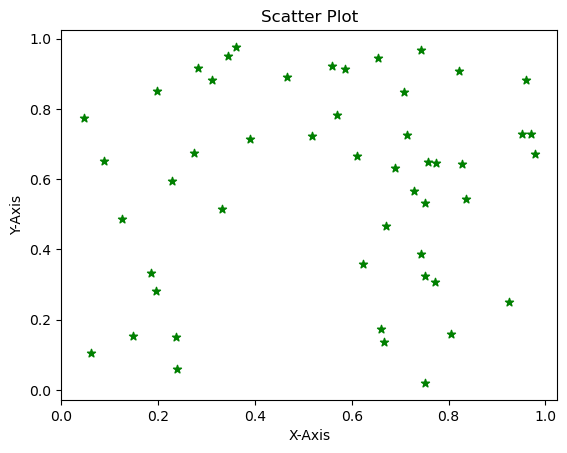

In [5]:
# 2. scatter - نقطه ای
xx = np.random.rand(50)
yy = np.random.rand(50)

plt.scatter(xx, yy, color = 'green', marker = '*')
plt.title('Scatter Plot')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

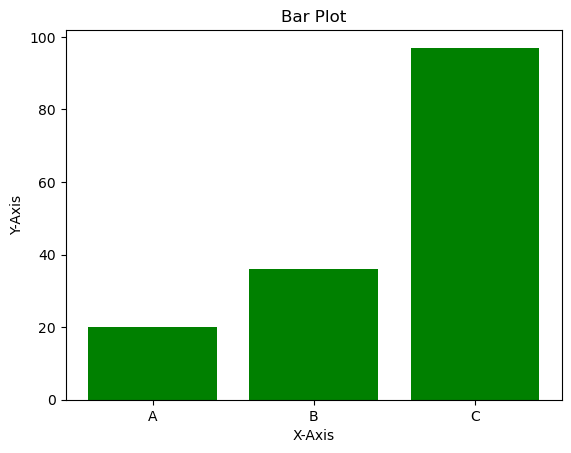

In [76]:
# 3. bar chart
cat = ['A', 'B', 'C']
val = [20, 36, 97]

plt.bar(cat, val, color = 'green')
plt.title('Bar Plot')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

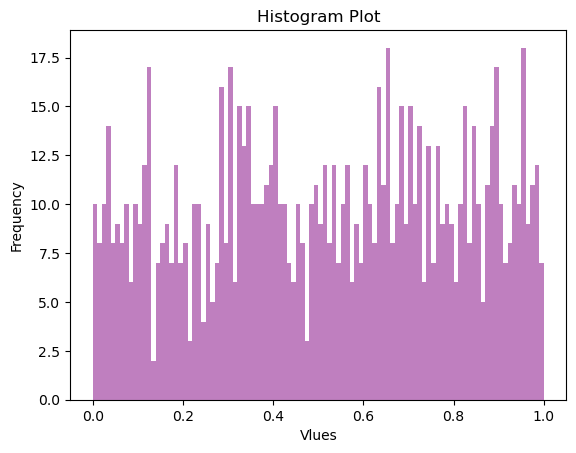

In [96]:
# 4. هیستوگرام
# bins = تعداد قسمت ها
# alpha = شفافیت or opacity | هرقدر کمتر شفافتر

# generating random data
data = np.random.rand(1000)

plt.hist(data, bins=100, color='purple', alpha=0.5)
plt.title('Histogram Plot')
plt.xlabel('Vlues')
plt.ylabel('Frequency')
plt.show()

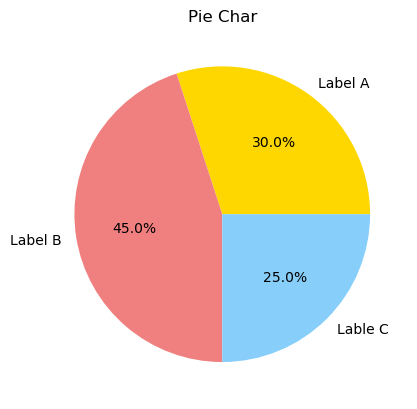

In [98]:
# 5. pie chart
# autopct = نشان دادن مقادیر اعشاری

labels = ['Label A', 'Label B', 'Lable C']
sizes = [30, 45, 25]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Pie Char')
plt.show()

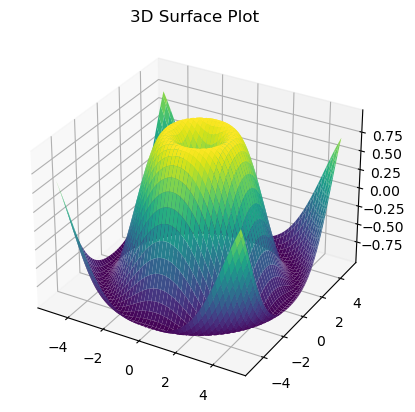

In [111]:
# 6. 3D
# linspace: یعنی بین 5 تا 5- 100 تا نقطه ایجاد کن
# cmap: کالر مپ هستش

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-5, 5, 100)
y1 = np.linspace(-5, 5, 100)
x1, y1 = np.meshgrid(x1, y1)
z = np.sin(np.sqrt(x1**2 + y1**2))

ax.plot_surface(x, y, z, cmap='viridis')
ax.set_title("3D Surface Plot")
plt.show()

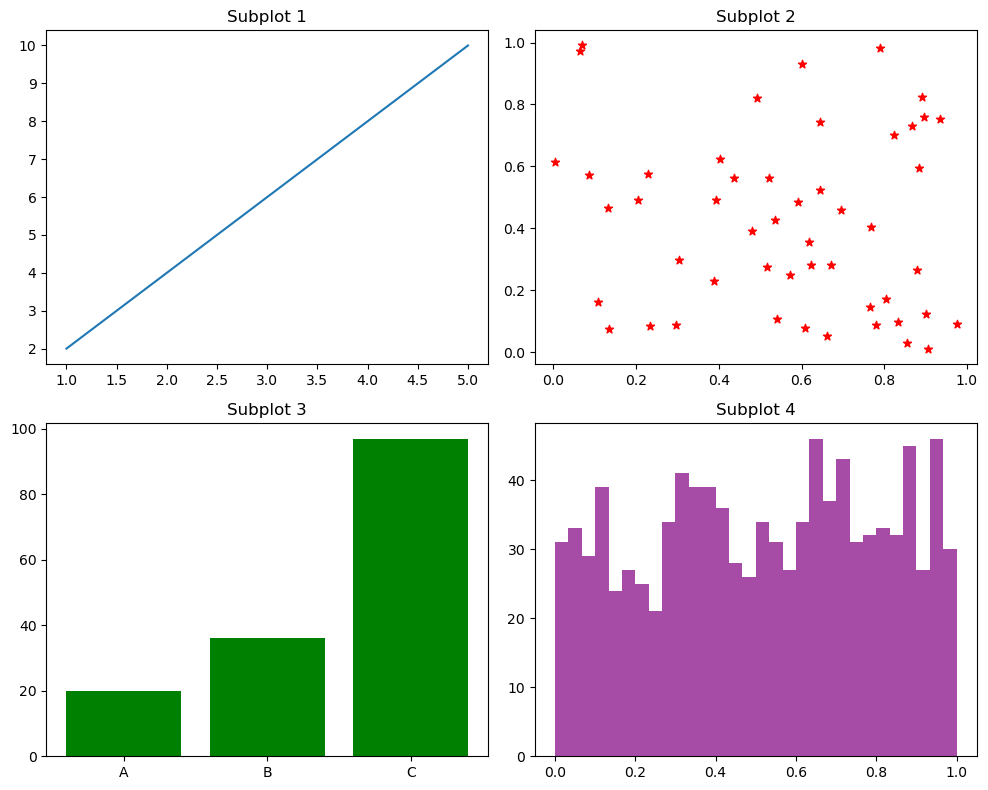

In [115]:
# 6. subplots

# figsize: اندازه هر کدام از مربع ها 10 در 8 باشه
# plt.tight_layout(): 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# plt 1
axes[0, 0].plot(x, y)
axes[0, 0].set_title('Subplot 1')

# plt 2
axes[0, 1].scatter(xx, yy, color='red', marker='*')
axes[0, 1].set_title('Subplot 2')

# plt 3
axes[1, 0].bar(cat, val, color='green')
axes[1, 0].set_title('Subplot 3')

# plt 4 - 3D
axes[1, 1].hist(data, bins=30, color='purple', alpha=0.7)
axes[1, 1].set_title('Subplot 4')

plt.tight_layout()
plt.show()

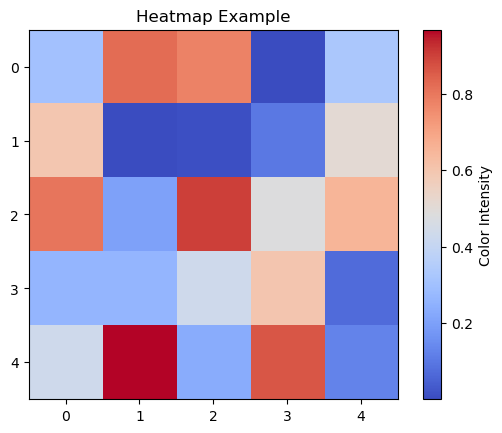

In [123]:
# 7. heatmap: نشان می دهد چه داده ای چه مقداری است


data2 = np.random.rand(5, 5)

plt.imshow(data2, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Color Intensity')
plt.title('Heatmap Example')
plt.show()

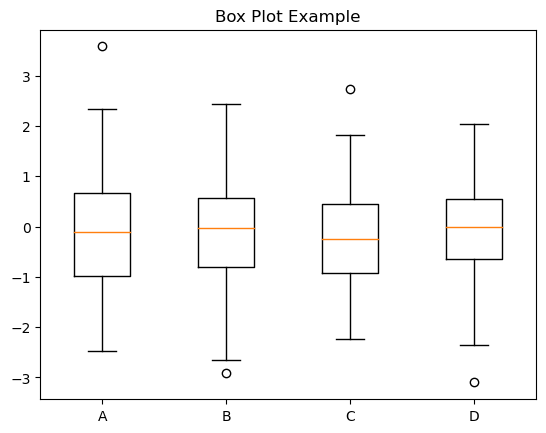

In [131]:
# 8. box plot

data3 = np.random.randn(100, 4)
# print(data3)

plt.boxplot(data3, labels=['A', 'B', 'C', 'D'])
plt.title("Box Plot Example")
plt.show()